In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Activation Functions

In [ ]:
x = np.linspace(-5, 5, 200)

## Linear

Просто повертає вхідне значення.

In [ ]:
def linear(x):
    """
    Тотожна функція.
    f(x) = x
    """
    return x

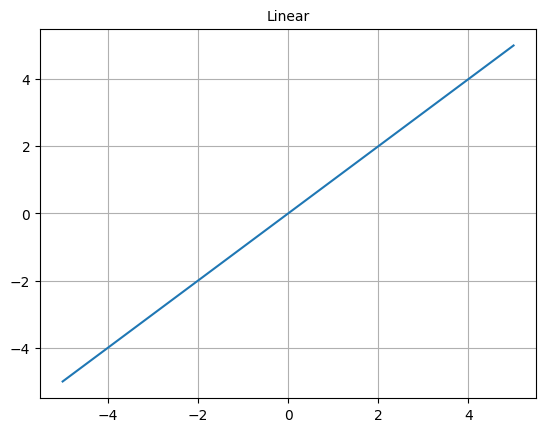

In [ ]:
plt.plot(x, linear(x))
plt.title("Linear", fontsize=10)
plt.grid(True)

**Переваги:**
  - Простота обчислення.
  - Зберігає масштаб вхідних даних.

**Недоліки:**
  - Не вносить нелінійності, тому не підходить для складних моделей.


**Використання:**
  - Вихідні шари в задачах регресії.

## Функція Хевісайда

Бінарна функція, яка дорівнює 0 для від'ємних значень та 1 для невід'ємних.

In [ ]:
def heaviside(x):
    """
    Функція Хевісайда (одинична "сходинка").
    f(x) = { 0, x < 0;
              1, x >= 0 }
    """
    return np.where(x < 0, 0, 1)

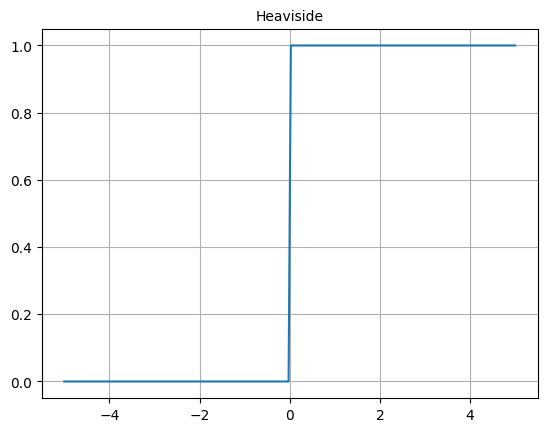

In [ ]:
plt.plot(x, heaviside(x))
plt.title("Heaviside", fontsize=10)
plt.grid(True)

**Переваги:**
  - Простота.
  - Може використовуватись для бінарної класифікації.

**Недоліки:**
  - Не диференційована в точці 0, що ускладнює навчання.
  - Занадто різка, що може призвести до нестабільності.

## Логістична функція (сигмоїда)

Плавна функція, яка стискає значення в діапазон від 0 до 1.

In [ ]:
def sigmoid(x):
    """
    Логістична функція (сигмоїда).
    f(x) = 1 / (1 + exp(-x))
    """
    return 1 / (1 + np.exp(-x))

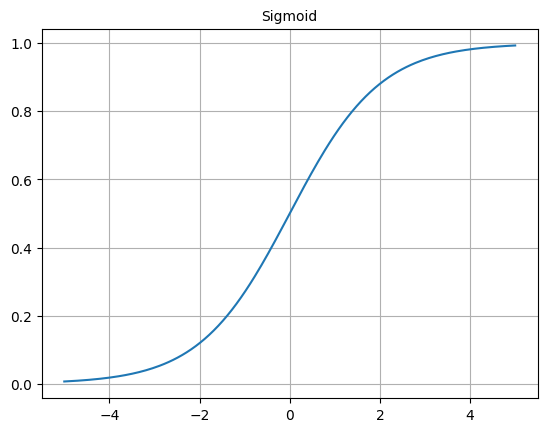

In [ ]:
plt.plot(x, sigmoid(x))
plt.title("Sigmoid", fontsize=10)
plt.grid(True)

**Переваги:**
  - Диференційована всюди.
  - Інтерпретується як ймовірність.

**Недоліки:**
  - Проблема зникаючого градієнту для великих або малих значень.
  - Вихід не центрований навколо нуля.

## Гіперболічний тангенс

Плавна функція, яка стискає значення в діапазон від -1 до 1.

In [ ]:
def tanh(x):
    """
    Гіперболічний тангенс.
    tanh(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))
    """
    return np.tanh(x)

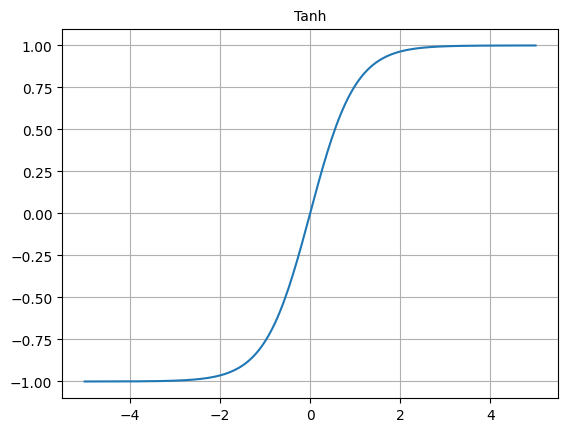

In [ ]:
plt.plot(x, tanh(x))
plt.title("Tanh", fontsize=10)
plt.grid(True)

**Переваги:**
  - Диференційована всюди.
  - Вихід центрований навколо нуля.

**Недоліки:**
  - Проблема зникаючого градієнту.


**Використання:**
  - Внутрішні шари, коли бажано центрування даних навколо нуля.

## Лінійний випрямляч (ReLU)

Лінійна для додатних значень та дорівнює нулю для від'ємних.

In [ ]:
def relu(x):
    """
    Лінійний випрямляч (ReLU).
    f(x) = max(0, x)
    """
    return np.maximum(0, x)


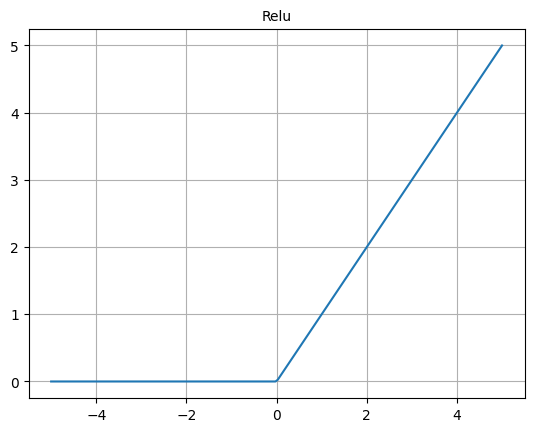

In [ ]:
plt.plot(x, relu(x))
plt.title("Relu", fontsize=10)
plt.grid(True)

**Переваги:**
  - Простота обчислення.
  - Уникає проблеми зникаючого градієнту для додатних значень.

**Недоліки:**
  - Не диференційована в точці 0 (хоча це не створює суттєвих проблем на практиці).
  - Проблема "мертвих нейронів" для від'ємних значень (нейрон активується тільки для додатних значень).

Використання:
  - Одна з найпопулярніших функцій активації для внутрішніх шарів.

## Параметричний лінійний випрямляч

Узагальнення ReLU, де для від'ємних значень використовується лінійна функція з параметром α.

In [ ]:
def prelu(x, alpha=0.1):
    """
    Параметричний лінійний випрямляч (PReLU).
    f(α, x) = { αx, x < 0
                x,   x >= 0 }
    """
    return np.where(x < 0, alpha * x, x)

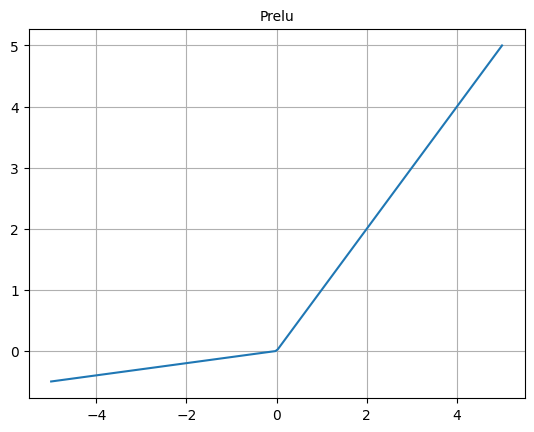

In [ ]:
plt.plot(x, prelu(x))
plt.title("Prelu", fontsize=10)
plt.grid(True)

Переваги:
  - Уникає проблеми "мертвих нейронів" ReLU.

Недоліки:
  - Потрібно налаштовувати параметр α.

# Нейронні мережі з нуля

Ми вивчимо основи побудови нейронних мереж без допомоги фреймворків глибокого навчання, використовуючи замість них NumPy.

<img src="https://raw.githubusercontent.com/lionelmessi6410/Neural-Networks-from-Scratch/0145471d6124831c071b3a772c943b9a57128984/figs/deep_nn-1.png" width="800"/>

Створення складних нейронних мереж з різними архітектурами в Python має бути стандартною практикою для будь-якого інженера машинного навчання та спеціаліста з обробки даних. Але справжнє розуміння того, як працює нейронна мережа, є не менш цінним. Саме на цьому ми зосередимося на самих основах того, як ми можемо будувати нейронні мережі, не вдаючись до допомоги фреймворків, які полегшують нам це завдання.

## Архітектура моделі
Ми будуємо базову глибоку нейронну мережу з 3 шарами: 1 вхідним шаром, 1 прихованим шаром і 1 вихідним шаром. Всі шари будуть повністю зв'язані. Ми реалізуємо функції активації ReLU та сигмоїд.

Спробуємо точно визначити шари. Щоб мати змогу класифікувати цифри, після запуску нейронної мережі ми повинні отримати ймовірності приналежності зображення до певного класу, адже тоді ми зможемо кількісно оцінити, наскільки добре працює наша нейронна мережа.

1. Вхідний шар: На цьому шарі ми подаємо наш набір даних, що складається з зображень 28x28 пікселів. Ми перетворюємо ці зображення в один масив з $28×28=784$ елементів. Це означає, що наш вхідний шар матиме 784 вузли.
2. Прихований шар: На цьому шарі ми вирішили зменшити кількість вузлів з 784 на вхідному шарі до 64 вузлів.
3. Вихідний шар: На цьому шарі ми зменшуємо 64 вузли до 10 вузлів, щоб ми могли порівняти вузли з міткою. Ця мітка отримується у вигляді масиву з 10 елементів, де один з елементів дорівнює 1, а решта - 0.

## Helper functions

In [ ]:
# Helper function
def show_images(image, num_row=2, num_col=5):
    # plot images
    image_size = int(np.sqrt(image.shape[-1]))
    image = np.reshape(image, (image.shape[0], image_size, image_size))
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num_row*num_col):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(image[i], cmap='gray', vmin=0, vmax=1)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

## Підготовка набору даних

У цьому прикладі ми будемо використовувати [набір даних MNIST](http://yann.lecun.com/exdb/mnist/), щоб продемонструвати, як створити нейронну мережу. MNIST містить 70 000 зображень рукописних цифр: 60 000 для навчання та 10 000 для тестування, кожне розміром $28×28$ пікселів, у відтінках сірого з значеннями пікселів від 0 до 255.

Тепер нам потрібно завантажити набір даних та попередньо обробити його, щоб ми могли використовувати його в NumPy. Ми виконуємо нормалізацію, діливши всі зображення на 255, і робимо так, щоб усі зображення мали значення від 0 до 1, оскільки це усуває деякі проблеми з чисельною стабільністю функцій активації пізніше. Для полегшення тренування використовуються мітки, закодовані методом one-hot, оскільки так можливо легше віднімати ці мітки від виходу нейронної мережі. Також вхідні дані завантажуються як плоский вектор з 28 * 28 = 784 елементів, оскільки цього вимагає вхідний шар.

In [ ]:
# Load data
mnist_data = fetch_openml("mnist_784")
x = mnist_data["data"]
y = mnist_data["target"]

# Normalize
x /= 255.0

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [ ]:
# One-hot encode labels
num_labels = 10
examples = y.shape[0]

x_new = x.to_numpy()
y_new = y.to_numpy().reshape(-1, 1)
y_new = OneHotEncoder(sparse=False).fit_transform(y_new)


# Split, reshape, shuffle
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [ ]:
y_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## One-hot Encoding

**One-hot encoding**, або кодування одиничним вектором, - це спосіб перетворення категоріальних даних в числову форму, яку може обробляти нейронна мережа. При цьому кожне унікальне значення категоріального признаку перетворюється на вектор, що містить один елемент 1 (одиницю) і всі інші елементи 0 (нулі).

В MNIST у нас є зображення цифр від 0 до 9. Кожна цифра представляє окрему категорію.

- Без one-hot encoding: Якщо ми просто подамо цифру як очікуване значення (наприклад, 3), нейронна мережа буде інтерпретувати це як числове значення. Це проблема, бо вказує про лінійний зв`язок між категоріям.
- З one-hot encoding: Ми перетворюємо кожну цифру на вектор з 10 елементів (бо в нас 10 цифр):

**Цифра,	One-hot вектор**

**0**,	[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

**1**,	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

**...**

**9**,	[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


**Для чого потрібен**:

- *Коректне представлення категорій*: Дозволяє нейронній мережі розрізняти категорії як окремі сутності, а не як числові значення.
- *Покращення навчання*: Зазвичай покращує навчання нейронної мережі для задач класифікації, оскільки дає більш інформативне представлення даних.
- *Сумісність з softmax*: One-hot encoding часто використовується разом з функцією активації softmax на виході нейронної мережі для багатокласової класифікації.

In [ ]:
y.to_numpy()

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
y_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y.to_numpy().shape, y_new.shape

((70000,), (70000, 10))

## EDA

Training data: (56000, 784) (56000, 10)
Test data: (14000, 784) (14000, 10)


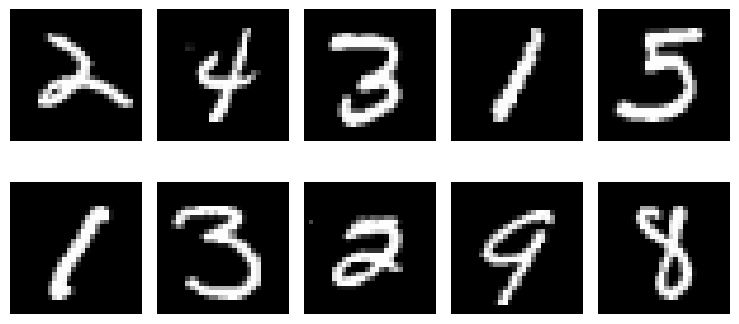

In [ ]:
print("Training data: {} {}".format(x_train.shape, y_train.shape))
print("Test data: {} {}".format(x_test.shape, y_test.shape))
show_images(x_train)

In [ ]:
28*28

784

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

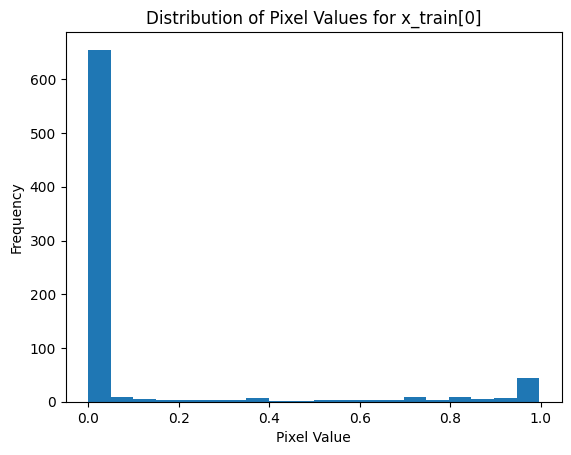

In [ ]:
plt.hist(x_train[0], bins=20)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Distribution of Pixel Values for x_train[0]')
plt.show()

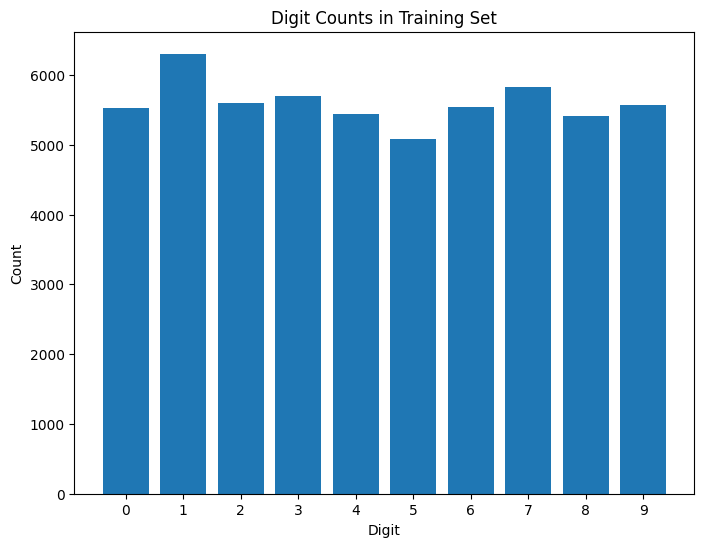

In [ ]:
# Digit counts
digit_counts_train = np.sum(y_train, axis=0)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(range(10), digit_counts_train)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Digit Counts in Training Set')
plt.xticks(range(10))
plt.show()

## Softmax

Приймає вектор чисел і перетворює його на розподіл ймовірностей. Кожен елемент вихідного вектора знаходиться в діапазоні від 0 до 1 і сума всіх елементів дорівнює 1.

In [ ]:
def softmax(x):
    """
    softmax(x) = exp(x) / ∑exp(x)
    """

    # Numerically stable with large exponentials
    exps = np.exp(x - x.max())
    return exps / np.sum(exps, axis=0)

softmax(np.array([1, 2, 3]))

array([0.09003057, 0.24472847, 0.66524096])

**Переваги:**
  - Перетворює вихід нейронної мережі на ймовірності.
  - Диференційована всюди.
  - Добре підходить для задач багатокласової класифікації.

**Недоліки:**
  - Може бути чутливою до дуже великих або дуже малих значень вхідних даних (проблема числової нестабільності), хоча це можна виправити шляхом нормалізації вхідних даних.

**Використання:**
  - Вихідний шар для задач багатокласової класифікації.

# Explanation

## Ініціалізація

Проблема, яка виникає, коли ми намагаємося реалізувати пряме поширення в нейронній мережі, полягає в тому, що ми намагаємося перетворити 784 вузли на 10. При створенні екземпляра класу `DeepNeuralNetwork` ми передаємо масив розмірів, який визначає кількість активацій для кожного шару.

```python
dnn = DeepNeuralNetwork(sizes=[784, 64, 10])
```

Це ініціалізує клас `DeepNeuralNetwork` за допомогою функції `__init__`.

```python
def __init__(self, sizes, activation='sigmoid'):
    ...
```

Щоб зробити ініціалізацію більш розумною, ми зменшуємо дисперсію ваг у кожному шарі. Згідно з [цим чудовим відео](https://www.coursera.org/lecture/deep-neural-network/weight-initialization-for-deep-networks-RwqYe) від Andrew Ng, ми встановимо дисперсію для кожного шару рівною 1/n, де n - кількість входів, що надходять на цей шар. Ми використовуємо функцію `np.random.randn()`, щоб отримати початкові ваги, які вибираються з стандартного нормального розподілу. Отже, щоб налаштувати дисперсію до 1/n, ми просто ділимо на √n.

Ініціалізацію ваг у нейронній мережі досить важко осмислити. Щоб дійсно зрозуміти, як і чому працює наступний підхід, вам потрібно розуміти лінійну алгебру, зокрема розмірність при використанні операції скалярного добутку, що виходить за рамки цього класу.

```python
def initialization(self):
    ...
```

## Пряме поширення

Пряме поширення складається з операції скалярного добутку в NumPy, яка виявляється просто множенням матриць. Як описано в статті [Вступ до нейронних мереж](https://mlfromscratch.com/neural-networks-explained/#/) , ми повинні помножити ваги на активації попереднього шару. Потім ми повинні застосувати функцію активації до результату.

Щоб пройти через кожен шар, ми послідовно застосовуємо операцію скалярного добутку, а потім функцію активації сигмоїд/ReLU. На останньому шарі ми використовуємо функцію активації softmax, оскільки ми хочемо отримати ймовірності кожного класу, щоб ми могли виміряти, наскільки добре працює наш поточний прохід прямого поширення.

<img src="https://raw.githubusercontent.com/lionelmessi6410/Neural-Networks-from-Scratch/0145471d6124831c071b3a772c943b9a57128984/figs/backprop_algo_forward.png" width="300"/>

```python
def feed_forward(self, x):
    ...
```

Нижче наведено функції активації, що використовуються в цій статті. Як бачите, ми надаємо версію з похідною для ReLU та сигмоїда, оскільки вона знадобиться нам пізніше, коли ми будемо виконувати зворотнє поширення по нейронній мережі.

```python
def relu(self, x, derivative=False):
    ...

def sigmoid(self, x, derivative=False):
    ...

def softmax(self, x):
    ...
```

Примітка: Була обрана чисельно стабільна версія функції softmax, більше про це можна прочитати в курсі [Stanford CS231n](https://cs231n.github.io/linear-classify/#softmax).


## Зворотнє поширення

Зворотнє поширення важко реалізувати правильно, оскільки існує багато розмірів і операцій, які повинні узгоджуватися, щоб усі операції були успішними. Ось повна функція для зворотного поширення; ми розглянемо кожне оновлення ваги нижче.

<img src="https://raw.githubusercontent.com/lionelmessi6410/Neural-Networks-from-Scratch/0145471d6124831c071b3a772c943b9a57128984/figs/backprop_algo_backward.png" width="400"/>

Для тих, хто цікавиться магією зворотного поширення, зверніться до [цієї чудової статті](https://mlfromscratch.com/neural-networks-explained/). Для тих, хто хоче заглибитись у математику та глибоко розібратися, зверніться до курсу [NTHU CS565600 Глибоке навчання](https://nthu-datalab.github.io/ml/index.html). Ось [слайд](https://nthu-datalab.github.io/ml/slides/10_NN_Design.pdf) та [відео](https://www.youtube.com/watch?v=uYRUbvyKXAo&list=PLlPcwHqLqJDk3A0qFgFUDlyALzaF44NTL&index=4&ab_channel=Shan-HungWu) про зворотнє поширення.

```python
def back_propagate(self, y, output):
    ...
```



## Навчання (стохастичний градієнтний спуск)

Ми визначили пряме та зворотнє поширення, але як ми можемо почати їх використовувати? Ми повинні створити цикл навчання і обрати стохастичний градієнтний спуск (SGD) як оптимізатор для оновлення параметрів нейронної мережі.

У функції навчання є два основні цикли. Один цикл - для кількості епох, що відповідає кількості проходів по всьому набору даних, а другий - для проходження по кожному пакету даних окремо.

Для кожного пакету ми виконуємо пряме поширення, викликаючи `self.feedforward()` з `x`, що є одним пакетом у масиві довжиною 784, як пояснювалося раніше. `output` (вихід) прямого поширення використовується разом з `y`, що є мітками, закодованими методом one-hot (еталонні значення), в зворотному поширенні. `self.back_propagate()` повертає градієнти ваг.

```python
def train(self, x_train, y_train, x_test, y_test):
    ...
```

Функція `optimize()` містить правила оновлення коду. Алгоритм SGD відносно простий: він оновлює мережу, безпосередньо використовуючи обчислений градієнт.

```python
def optimize(self, l_rate=0.1):
    ...
```

Після оновлення параметрів нейронної мережі ми можемо виміряти точність на валідаційному наборі, який ми зручно підготували раніше, щоб перевірити, наскільки добре працює наша мережа після кожної ітерації по всьому набору даних.

```python
def accuracy(self, y, output):
    return np.mean(np.argmax(y, axis=-1) == np.argmax(output.T, axis=-1))
```

Нарешті, ми можемо викликати функцію навчання, знаючи, що станеться. Ми використовуємо навчальні та валідаційні дані як вхідні дані для функції навчання, а потім чекаємо.

```python
dnn.train(x_train, y_train, x_val, y_val)
```

## Mini-Batch GD

Міні-пакетний градієнтний спуск (Mini-Batch Gradient Descent)

Варіація градієнтного спуску, де оновлення ваг відбувається на основі градієнта, обчисленого не для всього набору даних одразу, а для невеликих його підмножин, які називаються міні-пакетами (mini-batches).

**Основна ідея:**

Міні-пакетний ГС балансує між точністю оновлення вагів та швидкістю навчання. Він дозволяє:

- Прискорити процес навчання, оновлюючи ваги частіше.
- Зменшити вимоги до обсягу пам'яті, обробляючи дані частинами.
- Зменшити схильність до перенавчання завдяки стохастичності процесу навчання.

**Розмір mini-batch**: Важливий гіперпараметр, що визначає кількість прикладів, які використовуються для обчислення градієнта. Впливає на швидкість навчання, точність оновлення вагів та схильність до перенавчання. Типові значення: 32, 64, 128, 256.

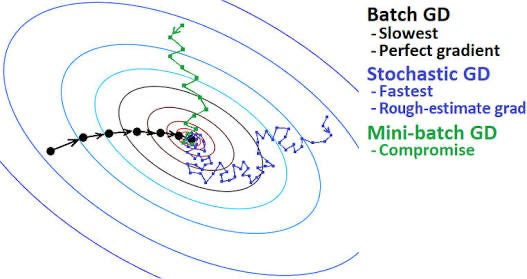

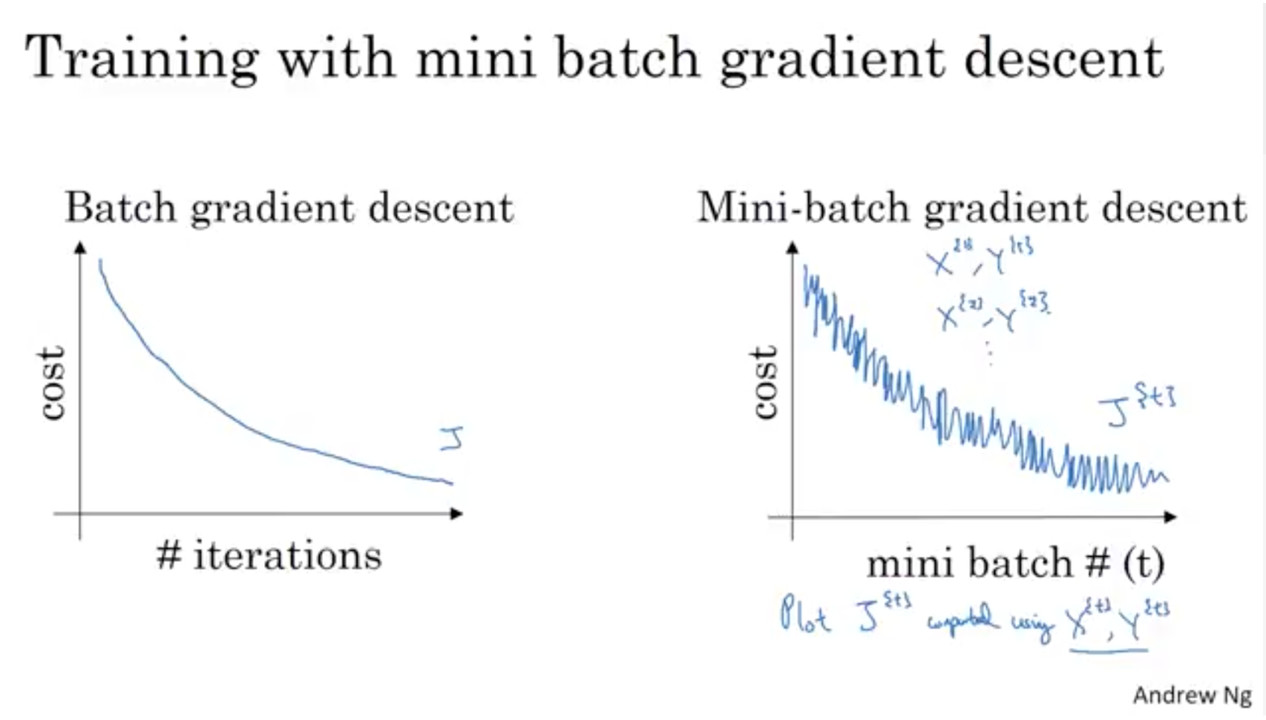

# Implementation

**3-шарова** нейронна мереда побудована з використанням Numpy

In [ ]:
class DeepNeuralNetwork():
    def __init__(self, sizes=[784, 64, 10], activation='sigmoid'):
        self.sizes = sizes

        # Choose activation function
        if activation == 'relu':
            self.activation = self.relu
        elif activation == 'sigmoid':
            self.activation = self.sigmoid
        else:
            raise ValueError("Activation function is currently not support, please use 'relu' or 'sigmoid' instead.")

        # Save all weights
        self.params = self.initialize()
        # Save all intermediate values, i.e. activations
        self.cache = {}

        self.train_meta = {
            "train_losses": [],
            "test_losses": []
        }

    def initialize(self):
        # number of nodes in each layer
        input_layer=self.sizes[0]
        hidden_layer=self.sizes[1]
        output_layer=self.sizes[2]

        params = {
            "W1": np.random.randn(hidden_layer, input_layer) * np.sqrt(1./input_layer),
            "b1": np.zeros((hidden_layer, 1)) * np.sqrt(1./input_layer),
            "W2": np.random.randn(output_layer, hidden_layer) * np.sqrt(1./hidden_layer),
            "b2": np.zeros((output_layer, 1)) * np.sqrt(1./hidden_layer)
        }
        return params

    def relu(self, x, derivative=False):
        """
        Derivative of ReLU is a bit more complicated since it is not differentiable at x = 0

        Forward path:
        relu(x) = max(0, x)
        In other word,
        relu(x) = 0, if x < 0
                = x, if x >= 0

        Backward path:
        ∇relu(x) = 0, if x < 0
                    = 1, if x >=0
        """

        if derivative:
            x = np.where(x < 0, 0, x)
            x = np.where(x >= 0, 1, x)
            return x
        return np.maximum(0, x)

    def sigmoid(self, x, derivative=False):
        """
        Forward path:
        σ(x) = 1 / 1+exp(-z)

        Backward path:
        ∇σ(x) = exp(-z) / (1+exp(-z))^2
        """

        if derivative:
            return (np.exp(-x))/((np.exp(-x)+1)**2)
        return 1/(1 + np.exp(-x))

    def softmax(self, x):
        """
        softmax(x) = exp(x) / ∑exp(x)
        """

        # Numerically stable with large exponentials
        exps = np.exp(x - x.max())
        return exps / np.sum(exps, axis=0)

    def feed_forward(self, x):
        """
        y = σ(wX + b)
        """

        self.cache["X"] = x
        self.cache["Z1"] = (self.params["W1"] @ self.cache["X"].T) + self.params["b1"]
        self.cache["A1"] = self.activation(self.cache["Z1"])
        self.cache["Z2"] = (self.params["W2"] @ self.cache["A1"]) + self.params["b2"]
        self.cache["A2"] = self.softmax(self.cache["Z2"])
        return self.cache["A2"]

    def back_propagate(self, y, output):
        """
        This is the backpropagation algorithm, for calculating the updates
        of the neural network's parameters.
        """

        current_batch_size = y.shape[0]

        dZ2 = output - y.T
        dW2 = (1./current_batch_size) * (dZ2 @ self.cache["A1"].T)
        db2 = (1./current_batch_size) * np.sum(dZ2, axis=1, keepdims=True)

        dA1 = (self.params["W2"].T @ dZ2)
        dZ1 = dA1 * self.activation(self.cache["Z1"], derivative=True)
        dW1 = (1./current_batch_size) * (dZ1 @ self.cache["X"])
        db1 = (1./current_batch_size) * np.sum(dZ1, axis=1, keepdims=True)

        self.grads = {"W1": dW1, "b1": db1, "W2": dW2, "b2": db2}
        return self.grads

    def cross_entropy_loss(self, y, output):
        """
        L(y, ŷ) = −∑ylog(ŷ).
        """

        l_sum = np.sum(np.multiply(y.T, np.log(output)))
        m = y.shape[0]
        l = -(1./m) * l_sum
        return l

    def optimize(self, l_rate=0.1):
        """
        Stochatic Gradient Descent (SGD):
        θ^(t+1) <- θ^t - η∇L(y, ŷ)
        """

        for key in self.params:
            self.params[key] = self.params[key] - l_rate * self.grads[key]

    def accuracy(self, y, output):
        return np.mean(np.argmax(y, axis=-1) == np.argmax(output.T, axis=-1))

    def train(
        self, x_train, y_train, x_test, y_test, epochs=10,
        batch_size=64, l_rate=0.1
    ):
        # Hyperparameters
        self.epochs = epochs
        self.batch_size = batch_size
        num_batches = -(-x_train.shape[0] // self.batch_size)

        start_time = time.time()
        template = "Epoch {}: {:.2f}s, train acc={:.2f}, train loss={:.2f}, test acc={:.2f}, test loss={:.2f}"

        # Train
        for i in range(self.epochs):
            # Shuffle
            permutation = np.random.permutation(x_train.shape[0])
            x_train_shuffled = x_train[permutation]
            y_train_shuffled = y_train[permutation]

            for j in range(num_batches):
                # Batch
                begin = j * self.batch_size
                end = min(begin + self.batch_size, x_train.shape[0] - 1)
                x = x_train_shuffled[begin:end]
                y = y_train_shuffled[begin:end]

                # Forward
                output = self.feed_forward(x)
                # Backprop
                grad = self.back_propagate(y, output)
                # Optimize
                self.optimize(l_rate=l_rate)

            # Evaluate performance
            ## Training data
            output = self.feed_forward(x_train)
            train_acc = self.accuracy(y_train, output)
            train_loss = self.cross_entropy_loss(y_train, output)
            ## Test data
            output = self.feed_forward(x_test)
            test_acc = self.accuracy(y_test, output)
            test_loss = self.cross_entropy_loss(y_test, output)

            self.train_meta["train_losses"].append(train_loss)
            self.train_meta["test_losses"].append(test_loss)

            print(template.format(i+1, time.time()-start_time, train_acc, train_loss, test_acc, test_loss))

## Результати

Результати повністю залежать від того, як ініціалізовані ваги та яку функцію активації ми використовуємо. Експериментально, через необмежену поведінку `relu()`, швидкість навчання слід встановити набагато меншою, ніж для `sigmoid()` (обмеженої).


In [ ]:
# Sigmoid
dnn_sig = DeepNeuralNetwork(sizes=[784, 64, 10], activation='sigmoid')
dnn_sig.train(x_train, y_train, x_test, y_test, batch_size=128, l_rate=4)

Epoch 1: 1.96s, train acc=0.93, train loss=0.22, test acc=0.93, test loss=0.23
Epoch 2: 3.79s, train acc=0.95, train loss=0.17, test acc=0.95, test loss=0.18
Epoch 3: 5.39s, train acc=0.96, train loss=0.12, test acc=0.95, test loss=0.15
Epoch 4: 8.42s, train acc=0.97, train loss=0.10, test acc=0.96, test loss=0.13
Epoch 5: 10.94s, train acc=0.97, train loss=0.08, test acc=0.96, test loss=0.12
Epoch 6: 12.57s, train acc=0.97, train loss=0.10, test acc=0.96, test loss=0.14
Epoch 7: 14.19s, train acc=0.97, train loss=0.10, test acc=0.95, test loss=0.15
Epoch 8: 15.79s, train acc=0.99, train loss=0.05, test acc=0.97, test loss=0.11
Epoch 9: 17.38s, train acc=0.98, train loss=0.06, test acc=0.97, test loss=0.11
Epoch 10: 19.02s, train acc=0.99, train loss=0.05, test acc=0.97, test loss=0.11


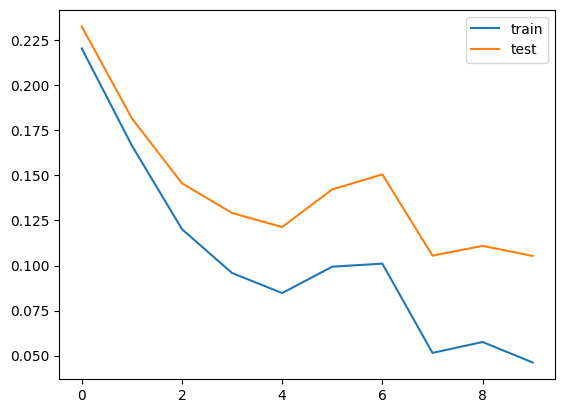

In [ ]:
plt.plot(dnn_sig.train_meta["train_losses"], label="train")
plt.plot(dnn_sig.train_meta["test_losses"], label="test")
plt.legend()
plt.show()

In [ ]:
x_test[1, :].shape

(784,)

In [ ]:
test_input = x_test[1, :].reshape(1, -1)

In [ ]:
dnn_sig.feed_forward(test_input)

array([[1.53616707e-09],
       [1.50504711e-07],
       [9.99995689e-01],
       [2.73916814e-06],
       [1.33325783e-08],
       [1.99205854e-10],
       [1.12492571e-06],
       [2.48094624e-08],
       [2.56511316e-07],
       [4.24238312e-11]])

In [ ]:
y_test[1, :]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# ReLU
dnn_relu = DeepNeuralNetwork(sizes=[784, 64, 10], activation='relu')
dnn_relu.train(x_train, y_train, x_test, y_test, batch_size=128, l_rate=0.05)

Epoch 1: 1.39s, train acc=0.89, train loss=0.41, test acc=0.88, test loss=0.42
Epoch 2: 2.75s, train acc=0.91, train loss=0.33, test acc=0.90, test loss=0.34
Epoch 3: 4.09s, train acc=0.91, train loss=0.30, test acc=0.91, test loss=0.31
Epoch 4: 5.66s, train acc=0.92, train loss=0.29, test acc=0.91, test loss=0.30
Epoch 5: 8.24s, train acc=0.92, train loss=0.28, test acc=0.92, test loss=0.29
Epoch 6: 10.27s, train acc=0.92, train loss=0.27, test acc=0.92, test loss=0.28
Epoch 7: 11.64s, train acc=0.92, train loss=0.26, test acc=0.92, test loss=0.27
Epoch 8: 12.98s, train acc=0.93, train loss=0.26, test acc=0.92, test loss=0.27
Epoch 9: 14.33s, train acc=0.93, train loss=0.25, test acc=0.92, test loss=0.27
Epoch 10: 15.64s, train acc=0.93, train loss=0.25, test acc=0.92, test loss=0.26


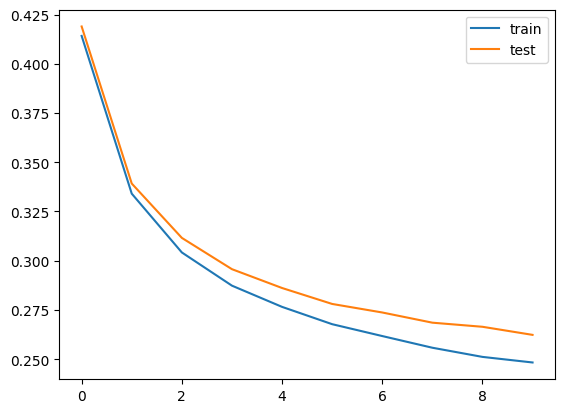

In [ ]:
plt.plot(dnn_relu.train_meta["train_losses"], label="train")
plt.plot(dnn_relu.train_meta["test_losses"], label="test")
plt.legend()
plt.show()

# Sk-learn

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(
    hidden_layer_sizes=(64,),
    learning_rate_init=0.01,
    max_iter=30,
    random_state=42, verbose=True
)

In [ ]:
clf.fit(x_train, y_train)

Iteration 1, loss = 0.72185684
Iteration 2, loss = 0.35039729
Iteration 3, loss = 0.28379080
Iteration 4, loss = 0.24762966
Iteration 5, loss = 0.22272816
Iteration 6, loss = 0.20676194
Iteration 7, loss = 0.19537883
Iteration 8, loss = 0.18274391
Iteration 9, loss = 0.17626915
Iteration 10, loss = 0.16788505
Iteration 11, loss = 0.15638981
Iteration 12, loss = 0.15522301
Iteration 13, loss = 0.14906406
Iteration 14, loss = 0.14724525
Iteration 15, loss = 0.13495922
Iteration 16, loss = 0.13792843
Iteration 17, loss = 0.13393468
Iteration 18, loss = 0.12660321
Iteration 19, loss = 0.12228623
Iteration 20, loss = 0.12176057
Iteration 21, loss = 0.11868932
Iteration 22, loss = 0.11385335
Iteration 23, loss = 0.11276423
Iteration 24, loss = 0.11095073
Iteration 25, loss = 0.11235826
Iteration 26, loss = 0.10068124
Iteration 27, loss = 0.10158364
Iteration 28, loss = 0.09970467
Iteration 29, loss = 0.09577315
Iteration 30, loss = 0.09376782


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64,), learning_rate_init=0.01, max_iter=30,
              random_state=42, verbose=True)

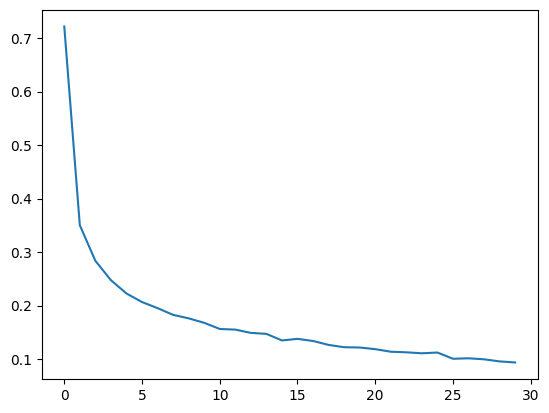

In [ ]:
plt.plot(clf.loss_curve_)
plt.show()

In [ ]:
sk_learn_predict = clf.predict_proba(x_test)
DeepNeuralNetwork().accuracy(y_test, sk_learn_predict.T)

0.9668571428571429

In [ ]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
sk_learn_predict[1]

array([6.71549607e-16, 5.62752699e-07, 4.49177766e-16, 2.20157383e-07,
       1.49391263e-06, 1.04720432e-04, 6.24680569e-23, 7.17984334e-09,
       1.73977319e-07, 9.99959281e-01])